In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime

In [2]:
dataset=pd.read_csv("C:/Users/pooja/Air_Pollution_Prediction/dataset.csv")
dataset['Date']=pd.to_datetime(dataset['Date'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Date'])    
df = indexedDataset.copy()

In [3]:
from datetime import datetime
indexedDataset.tail(5)

,No2
Date,
2015-12-16,22.0
2015-12-19,26.0
2015-12-22,15.0
2015-12-27,24.0
2015-12-29,19.0


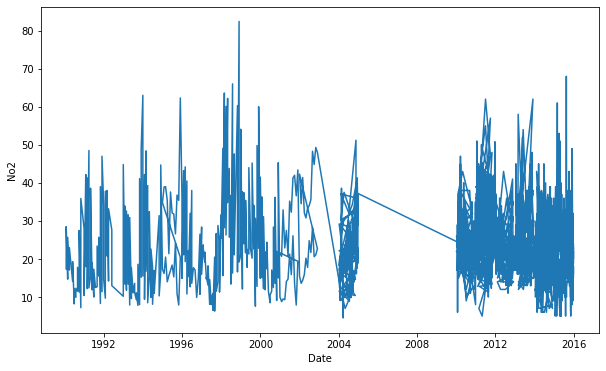

In [4]:
#plot graph

plt.xlabel("Date")
plt.ylabel("No2")
plt.plot(indexedDataset)

In [5]:
#determining rolling statistics
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                  No2
Date                 
1990-02-01        NaN
1990-02-01        NaN
1990-03-01        NaN
1990-03-01        NaN
1990-04-01        NaN
...               ...
2015-12-16  27.333333
2015-12-19  27.583333
2015-12-22  25.833333
2015-12-27  26.000000
2015-12-29  26.000000

[2684 rows x 1 columns]                  No2
Date                
1990-02-01       NaN
1990-02-01       NaN
1990-03-01       NaN
1990-03-01       NaN
1990-04-01       NaN
...              ...
2015-12-16  5.432785
2015-12-19  5.282188
2015-12-22  5.702206
2015-12-27  5.608435
2015-12-29  5.608435

[2684 rows x 1 columns]


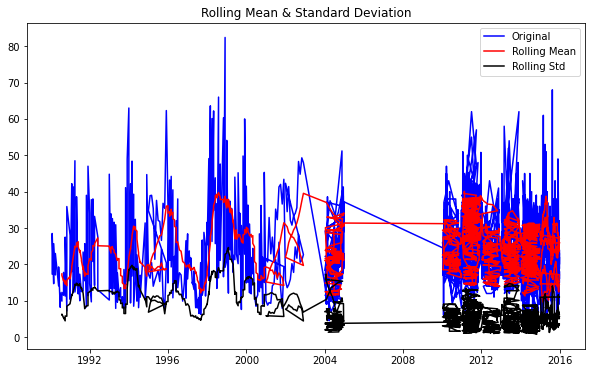

In [6]:
#plot rolling statistics
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label="Rolling Std")
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [9]:
#perform Dickey Fuller test:
#conda install statsmodels --execute this in conda environment, else you will get error

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest=adfuller(indexedDataset['No2'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number Of Obaservations Used'])
for key ,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -6.397419e+00
p-value                         2.034549e-08
#Lags used                      1.300000e+01
Number Of Obaservations Used    2.670000e+03
Critical Value(1%)             -3.432802e+00
dtype: float64
Test Statistic                 -6.397419e+00
p-value                         2.034549e-08
#Lags used                      1.300000e+01
Number Of Obaservations Used    2.670000e+03
Critical Value(1%)             -3.432802e+00
Critical Value(5%)             -2.862623e+00
dtype: float64
Test Statistic                 -6.397419e+00
p-value                         2.034549e-08
#Lags used                      1.300000e+01
Number Of Obaservations Used    2.670000e+03
Critical Value(1%)             -3.432802e+00
Critical Value(5%)             -2.862623e+00
Critical Value(10%)            -2.567347e+00
dtype: float64


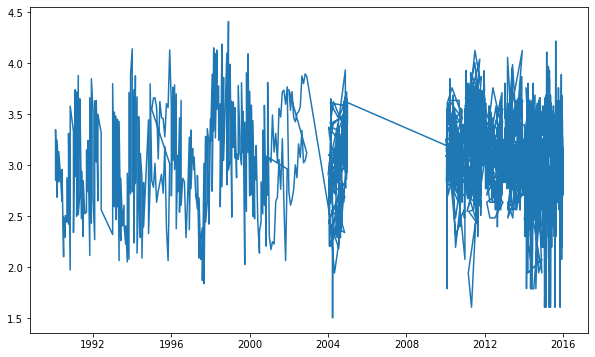

In [10]:
#Estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

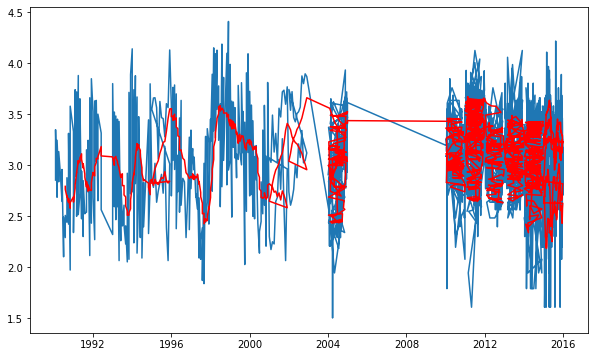

In [11]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [12]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#removing NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,No2
Date,
1990-08-01,-0.502015
1990-08-01,-0.256045
1990-09-01,-0.247667
1990-09-01,0.173238
1990-10-01,-0.212684
1990-10-01,0.637107
1990-11-01,-0.606213
1990-11-01,0.945645
1991-01-01,0.639943
